### Cancer Diagnostics

Using set of breast cancer data, create a model to predict breast cancer. Also, what traits are most indicative of whether or not an individual will be diagnosed?

<b>Dataset: </b>
http://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Original%29

In [1]:
#Import modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import scipy
from math import sqrt
from collections import Counter
import warnings
import seaborn as sns
import random
style.use ('fivethirtyeight')

warnings.filterwarnings(
    action="ignore",
    module="scipy",
    message="^internal gelsd")

%matplotlib inline

In [2]:
#load dataset
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data',
                names=['id','clump_thickness','uniform_cell_size',
'uniform_cell_shape','marginal_adhesion','single_epi_cell_size','bare_nuclei','bland_chromation',
'normal_nucleoli','mitoses','class'])
df.replace('?',-99999, inplace=True)
df.drop(['id'], 1, inplace=True)

In [3]:
#check datatypes
df.dtypes

clump_thickness          int64
uniform_cell_size        int64
uniform_cell_shape       int64
marginal_adhesion        int64
single_epi_cell_size     int64
bare_nuclei             object
bland_chromation         int64
normal_nucleoli          int64
mitoses                  int64
class                    int64
dtype: object

In [4]:
#Change bare_nuclei to numeric
df.bare_nuclei=pd.to_numeric(df.bare_nuclei)

In [5]:
#Recheck datatypes
df.dtypes

clump_thickness         int64
uniform_cell_size       int64
uniform_cell_shape      int64
marginal_adhesion       int64
single_epi_cell_size    int64
bare_nuclei             int64
bland_chromation        int64
normal_nucleoli         int64
mitoses                 int64
class                   int64
dtype: object

In [6]:
df.head()

,clump_thickness,uniform_cell_size,uniform_cell_shape,marginal_adhesion,single_epi_cell_size,bare_nuclei,bland_chromation,normal_nucleoli,mitoses,class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2


Text(0.5, 1.0, 'Variable Correlation')

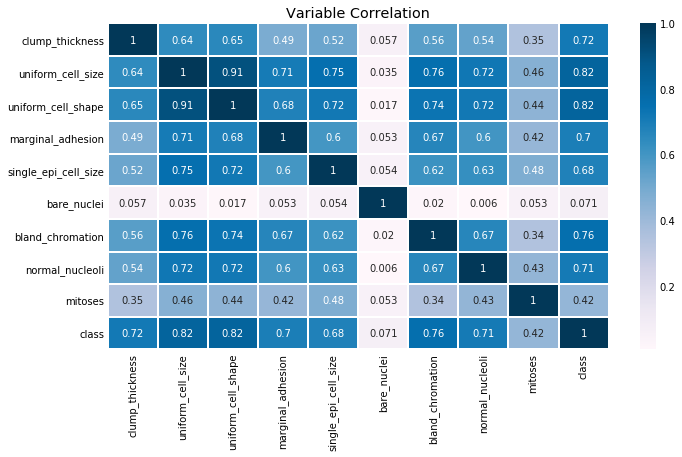

In [7]:
#Correlations

plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),cmap = 'PuBu',linewidth = 1,annot= True, annot_kws={"size": 10})
plt.title('Variable Correlation')

In [8]:
#Setup X and y
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X= df.drop(['class'],1)
y=df['class']
X = scaler.fit_transform(X)

c:\users\genta\appdata\local\programs\python\python37\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
c:\users\genta\appdata\local\programs\python\python37\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [9]:
#train test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)


#### As Logistic Regression

In [10]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(C=100)
logreg.fit(X_train,y_train)

c:\users\genta\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=100, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [11]:
pred = logreg.predict(X_test)

In [12]:
logreg.score(X_train,y_train)

0.9713774597495528

In [13]:
logreg.score(X_test,y_test)

0.9428571428571428

In [14]:
#confision matrix

from sklearn.metrics import confusion_matrix

cm=confusion_matrix(y_test,pred)

cm

array([[87,  2],
       [ 6, 45]], dtype=int64)

In [15]:

from sklearn.metrics import classification_report
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           2       0.94      0.98      0.96        89
           4       0.96      0.88      0.92        51

   micro avg       0.94      0.94      0.94       140
   macro avg       0.95      0.93      0.94       140
weighted avg       0.94      0.94      0.94       140



In [16]:
print(pred[0:10])

[4 2 4 2 2 2 4 2 2 2]


#### As Random Forest

In [17]:
from sklearn import ensemble
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import GridSearchCV

param_grid = {'max_depth': [80, 90, 100, 110],
              'max_features': [2, 3],
              'min_samples_leaf': [3, 4, 5],
              'min_samples_split': [8, 10, 12],
              'n_estimators': [100, 200, 300, 1000]}
# Create a basic model
rf = RandomForestClassifier(random_state=21)
# Instantiate the grid search model
rf_cv = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 0)
rf_cv.fit(X_train, y_train)
print(rf_cv.best_params_)
score=rf_cv.best_score_
print("Accuracy: %s" % '{:.2%}'.format(score))

{'max_depth': 80, 'max_features': 2, 'min_samples_leaf': 3, 'min_samples_split': 8, 'n_estimators': 200}
Accuracy: 97.50%


In [18]:
from sklearn.model_selection import cross_val_score
cross_val_score(rf_cv, X_train, y_train, cv=10)

array([0.98214286, 0.94642857, 0.96428571, 0.96428571, 0.96428571,
       0.96428571, 0.96428571, 0.98214286, 1.        , 1.        ])

In [22]:
rfpred = rf_cv.predict(X_test)

In [23]:
print(rfpred[0:10])

[4 2 4 2 2 2 4 2 2 2]


#### As Support Vector

In [25]:
#Support vector
from sklearn.svm import SVR
svr = SVR(gamma='scale')
svr.fit(X_train, y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [26]:
svr.score(X_train, y_train)

0.9061484928735479

In [27]:
#cross validation
from sklearn.model_selection import cross_val_score
cross_val_score(svr, X_train, y_train, cv=5)

array([0.87672536, 0.87321391, 0.8058563 , 0.82369983, 0.94874942])

In [28]:
svrpredict = svr.predict(X_test)

In [29]:
print(svrpredict[0:10])

[4.01827047 1.92937778 3.92600903 1.89981774 1.95605319 2.00636834
 3.8705359  1.9825272  1.91946221 2.07032359]
